In [2]:
import pandas as pd
#import requests
#from bs4 import BeautifulSoup

#import time

from pandas import Series, DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style


from pandas import set_option
set_option("display.max_rows", 35)

LARGE_FIGSIZE = (12, 8)
style.use('ggplot')
%matplotlib inline

In [3]:
# file desc: https://www.fec.gov/campaign-finance-data/all-candidates-file-description/
all_candidates_df = pd.read_csv('weball18.txt',sep='|', header=None)
all_candidates_df.columns = ['CAND_ID',
                             'CAND_NAME',
                             'CAND_ICI',
                             'PTY_CD',
                             'CAND_PTY_AFFILIATION',
                             'TTL_RECEIPTS',
                             'TRANS_FROM_AUTH',
                             'TTL_DISB',
                             'TRANS_TO_AUTH',
                             'COH_BOP',
                             'COH_COP',
                             'CAND_CONTRIB',
                             'CAND_LOANS',
                             'OTHER_LOANS',
                             'CAND_LOAN_REPAY',
                             'OTHER_LOAN_REPAY',
                             'DEBTS_OWED_BY',
                             'TTL_INDIV_CONTRIB',
                             'CAND_OFFICE_ST',
                             'CAND_OFFICE_DISTRICT',
                             'SPEC_ELECTION',
                             'PRIM_ELECTION',
                             'RUN_ELECTION',
                             'GEN_ELECTION',
                             'GEN_ELECTION_PERCENT',
                             'OTHER_POL_CMTE_CONTRIB',
                             'POL_PTY_CONTRIB',
                             'CVG_END_DT',
                             'INDIV_REFUNDS',
                             'CMTE_REFUNDS']
tmp = all_candidates_df.head()
tmp

,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,...,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PERCENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS
0,H8AK00132,"SHEIN, DIMITRI",C,1,DEM,190829.50,0.0,71732.03,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,06/30/2018,0.0,0.0
1,H6AK00045,"YOUNG, DONALD E",I,2,REP,772528.18,0.0,572719.52,0.0,269726.86,...,NaN,NaN,NaN,NaN,NaN,354661.9,0.0,06/30/2018,1500.0,0.0
2,H8AK00116,"LEDOUX, GABRIELLE R",C,2,REP,0.00,0.0,540033.00,0.0,479.00,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,06/30/2018,0.0,0.0
3,H8AK01031,"NELSON, THOMAS JOHN",C,2,REP,1887.68,0.0,827.66,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,06/30/2018,0.0,0.0
4,H8AK00140,"GALVIN, ALYSE",C,3,IND,530656.46,0.0,263166.66,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,8000.0,0.0,06/30/2018,312.0,0.0


In [4]:
tmp = tmp.T
tmp

,0,1,2,3,4
CAND_ID,H8AK00132,H6AK00045,H8AK00116,H8AK01031,H8AK00140
CAND_NAME,"SHEIN, DIMITRI","YOUNG, DONALD E","LEDOUX, GABRIELLE R","NELSON, THOMAS JOHN","GALVIN, ALYSE"
CAND_ICI,C,I,C,C,C
PTY_CD,1,2,2,2,3
CAND_PTY_AFFILIATION,DEM,REP,REP,REP,IND
TTL_RECEIPTS,190830,772528,0,1887.68,530656
TRANS_FROM_AUTH,0,0,0,0,0
TTL_DISB,71732,572720,540033,827.66,263167
TRANS_TO_AUTH,0,0,0,0,0
COH_BOP,0,269727,479,0,0


In [5]:
all_candidates_df.shape

(3573, 30)

In [6]:
all_candidates_df.count()

CAND_ID                   3573
CAND_NAME                 3573
CAND_ICI                  3487
PTY_CD                    3573
CAND_PTY_AFFILIATION      3573
TTL_RECEIPTS              3573
TRANS_FROM_AUTH           3573
TTL_DISB                  3573
TRANS_TO_AUTH             3573
COH_BOP                   3573
COH_COP                   3573
CAND_CONTRIB              3573
CAND_LOANS                3573
OTHER_LOANS               3573
CAND_LOAN_REPAY           3573
OTHER_LOAN_REPAY          3573
DEBTS_OWED_BY             3573
TTL_INDIV_CONTRIB         3573
CAND_OFFICE_ST            3573
CAND_OFFICE_DISTRICT      3572
SPEC_ELECTION                0
PRIM_ELECTION                0
RUN_ELECTION                 0
GEN_ELECTION                 0
GEN_ELECTION_PERCENT         0
OTHER_POL_CMTE_CONTRIB    3573
POL_PTY_CONTRIB           3573
CVG_END_DT                3573
INDIV_REFUNDS             3573
CMTE_REFUNDS              3573
dtype: int64

In [7]:
# max receipt number
ttl_receipt_max = all_candidates_df['TTL_RECEIPTS'].max()

In [8]:
# the max row
all_candidates_df[all_candidates_df.TTL_RECEIPTS == ttl_receipt_max]

,CAND_ID,CAND_NAME,CAND_ICI,PTY_CD,CAND_PTY_AFFILIATION,TTL_RECEIPTS,TRANS_FROM_AUTH,TTL_DISB,TRANS_TO_AUTH,COH_BOP,...,SPEC_ELECTION,PRIM_ELECTION,RUN_ELECTION,GEN_ELECTION,GEN_ELECTION_PERCENT,OTHER_POL_CMTE_CONTRIB,POL_PTY_CONTRIB,CVG_END_DT,INDIV_REFUNDS,CMTE_REFUNDS
3018,P80001571,"TRUMP, DONALD J",I,2,REP,50575265.43,29690855.37,25100098.49,357005.88,7611702.92,...,NaN,NaN,NaN,NaN,NaN,11605.0,0.0,06/30/2018,43602.23,13265.87


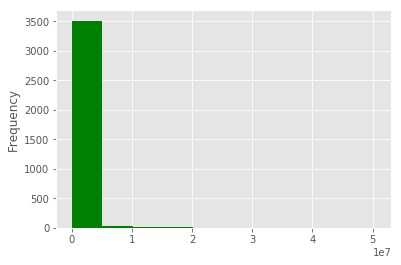

In [9]:
# mac reeipt distribution

#all_candidates_df.hist(column='TTL_RECEIPTS')
all_candidates_df['TTL_RECEIPTS'].T.plot(kind='hist', color='g')

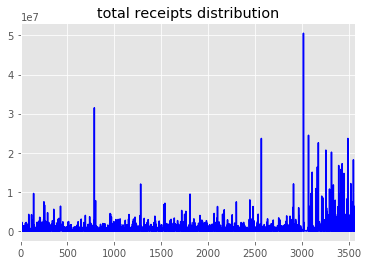

In [10]:
all_candidates_df['TTL_RECEIPTS'] = all_candidates_df['TTL_RECEIPTS'].astype(int)
all_candidates_df['TTL_RECEIPTS'].plot(title='total receipts distribution', color='b')

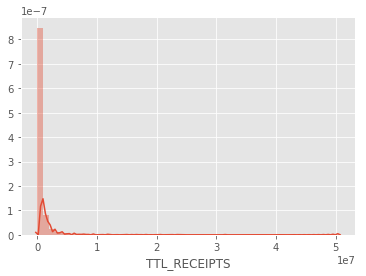

In [11]:
sns.distplot(all_candidates_df['TTL_RECEIPTS'])

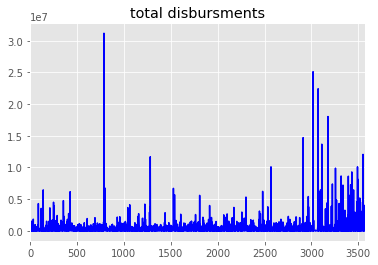

In [12]:
all_candidates_df['TTL_DISB'].plot(title='total disbursments', color='b')

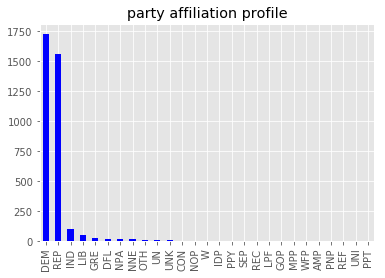

In [13]:
all_candidates_df.CAND_PTY_AFFILIATION.value_counts().plot(kind='bar', color='b', title='party affiliation profile')

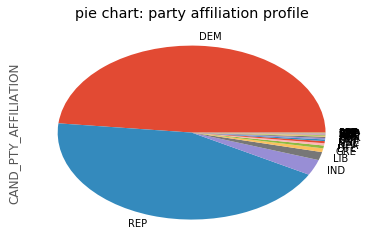

In [14]:
all_candidates_df.CAND_PTY_AFFILIATION.value_counts().plot(kind='pie', title='pie chart: party affiliation profile')

In [42]:
# largest candidate contribtuion
print('largest self contribution:{}'.format(all_candidates_df.CAND_CONTRIB.max()))
print('who: {}'.format(all_candidates_df[all_candidates_df.CAND_CONTRIB == all_candidates_df.CAND_CONTRIB.max()].CAND_NAME))

largest self contribution:14095853.0
who: 3177    SCOTT, RICK
Name: CAND_NAME, dtype: object


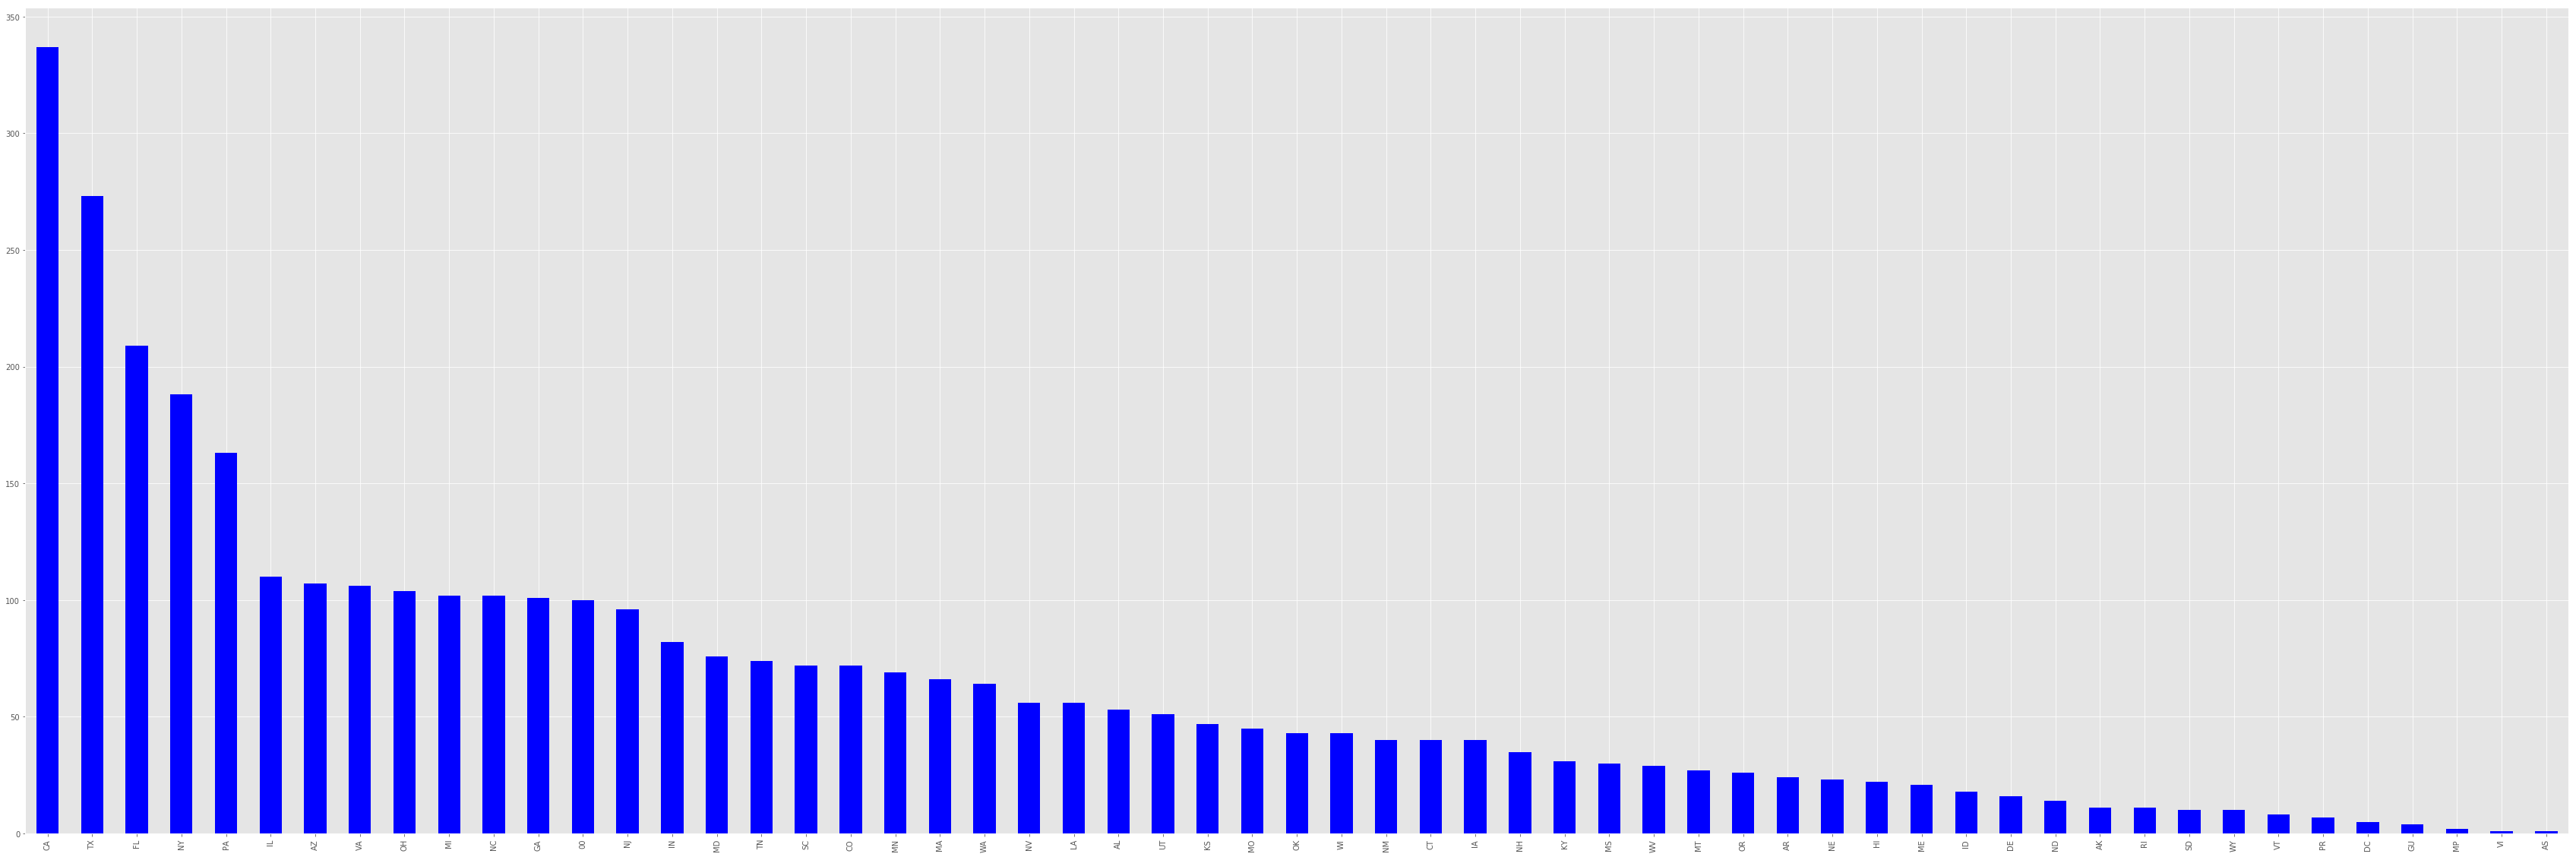

In [71]:
plt.figure(figsize=(60,20))
all_candidates_df.CAND_OFFICE_ST.value_counts().plot(kind='bar', color='b')

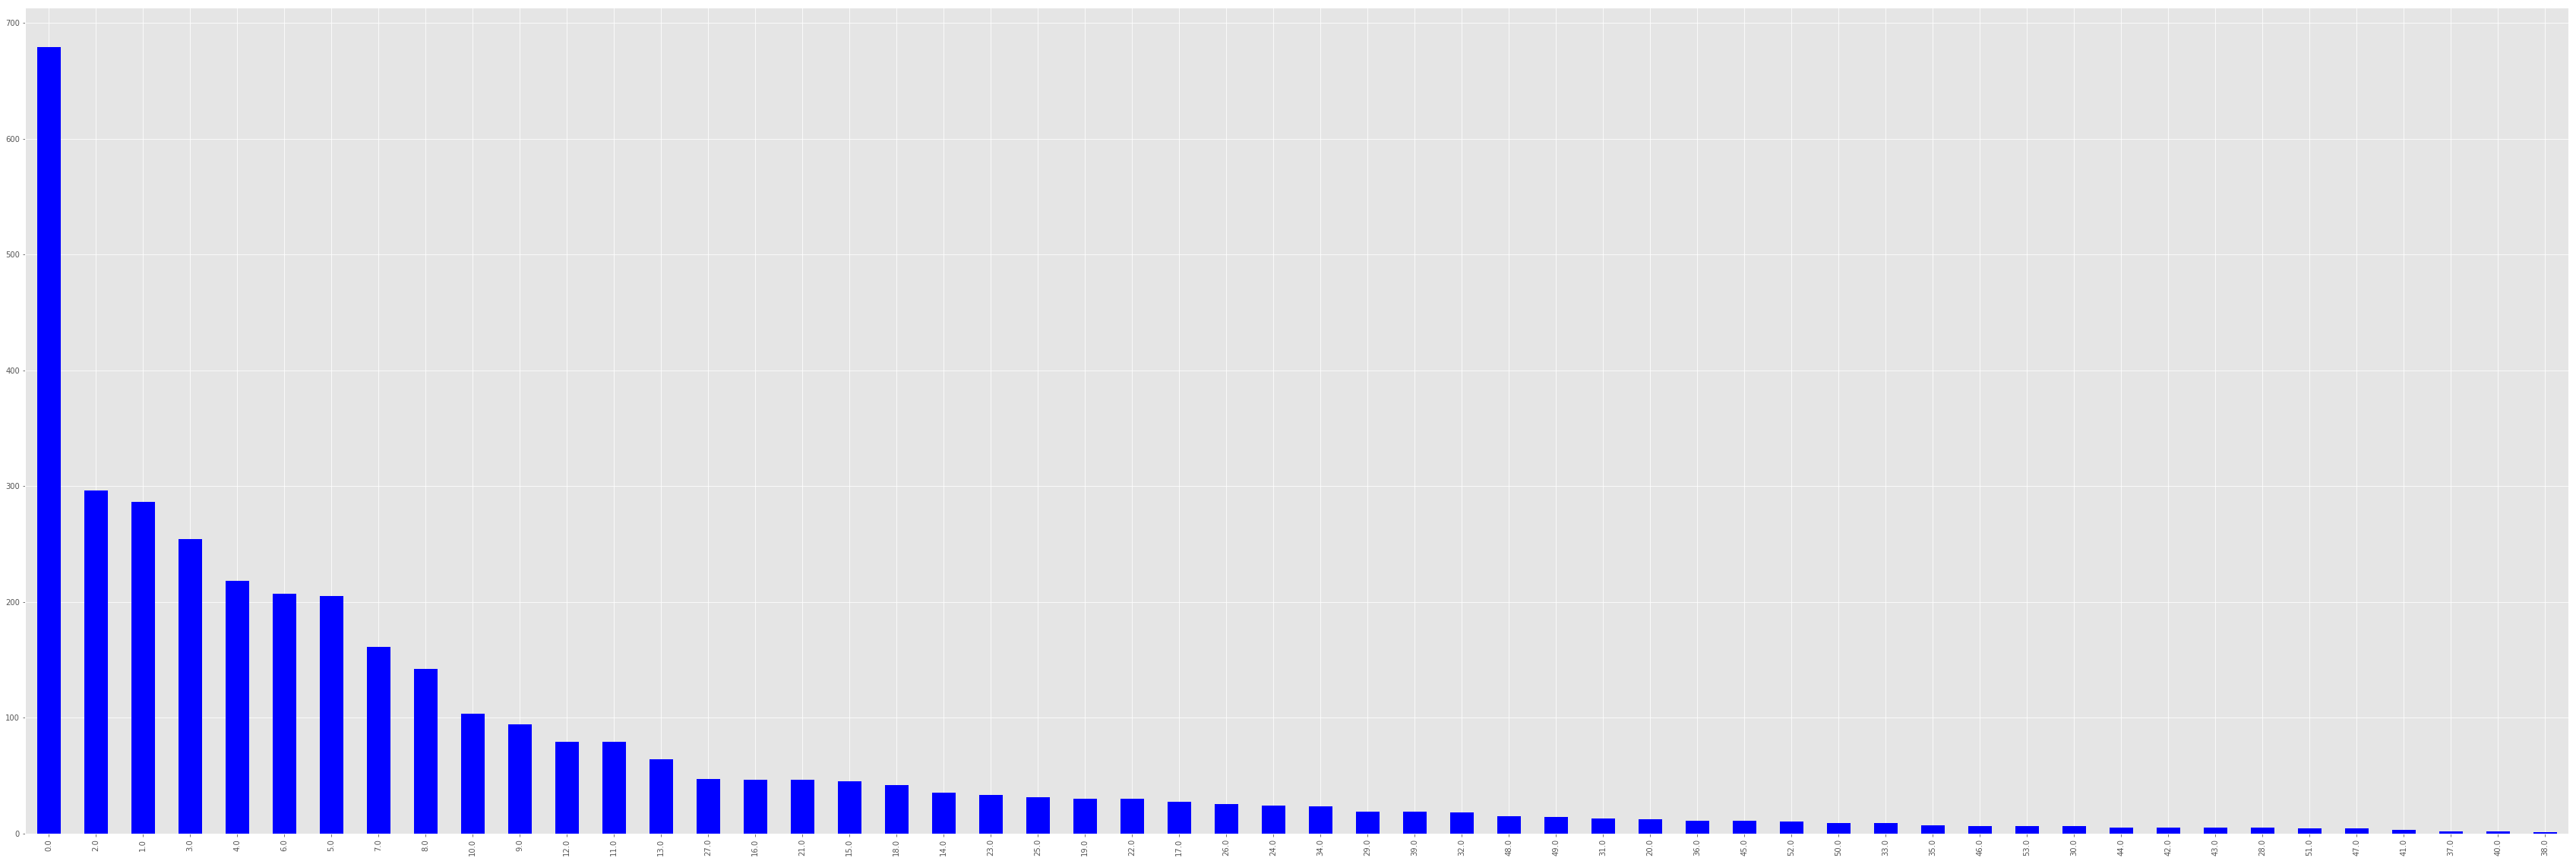

In [72]:
plt.figure(figsize=(60,20))
all_candidates_df.CAND_OFFICE_DISTRICT.value_counts().plot(kind='bar', color='b')

In [53]:
print('Top 5:')
all_candidates_df.CAND_OFFICE_ST.value_counts()[:5]

Top 5:


CA    337
TX    273
FL    209
NY    188
PA    163
Name: CAND_OFFICE_ST, dtype: int64

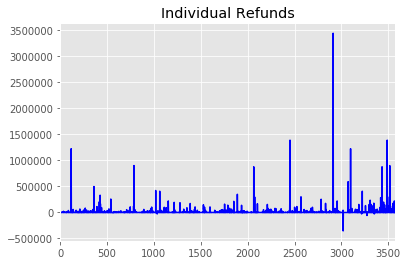

In [62]:
all_candidates_df.INDIV_REFUNDS.plot(title='Individual Refunds', color='b')

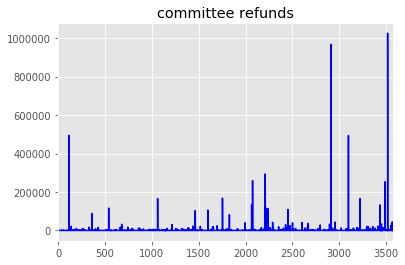

In [61]:
all_candidates_df.CMTE_REFUNDS.plot(title='committee refunds', color='b')

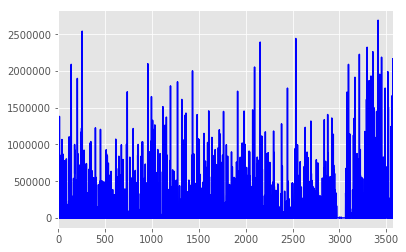

In [63]:
all_candidates_df.OTHER_POL_CMTE_CONTRIB.plot(color='b')